#  REKOMENDASI FILM

Dataset yang digunakan adalah Movie Dataset yang berasal dari  (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

**by zakyalfatih - zakyal2004@gmail.com**

# DATA LOADING

## Import Library

In [92]:
# Library bawaan Python
import os
import shutil
import zipfile
from ast import literal_eval

# Manipulasi dan analisis data
import pandas as pd
import numpy as np
from scipy import stats
from scipy.sparse import csr_matrix

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud
%matplotlib inline

# Machine Learning dan Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# TensorFlow dan Keras untuk Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping



##  Extrak Dataset

Selanjutnya, kita akan mengekstrak file zip dan mengambil dataset dalam format csv

In [2]:
# Path file zip dan direktori tujuan ekstrak
zip_path = "/content/movie_recs.zip"
extract_path = "/content/movie_recs"

# Ekstrak zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ File berhasil diekstrak ke:", extract_path)

✅ File berhasil diekstrak ke: /content/movie_recs


In [3]:
# Lihat semua file CSV yang berhasil diekstrak
for filename in os.listdir(extract_path):
    print("📄", filename)


📄 movies_metadata.csv
📄 links_small.csv
📄 ratings.csv
📄 keywords.csv
📄 links.csv
📄 credits.csv
📄 ratings_small.csv


## Reading Data

In [4]:
# Membaca file dataset
movies = pd.read_csv(f"{extract_path}/movies_metadata.csv", low_memory=False)
ratings = pd.read_csv(f"{extract_path}/ratings_small.csv", low_memory=False)
ratings_all = pd.read_csv(f"{extract_path}/ratings.csv", low_memory=False)
keywords = pd.read_csv(f"{extract_path}/keywords.csv", low_memory=False)
credits = pd.read_csv(f"{extract_path}/credits.csv", low_memory=False)
links = pd.read_csv(f"{extract_path}/links.csv", low_memory=False)
links_small = pd.read_csv(f"{extract_path}/links_small.csv", low_memory=False)

print("✅ Semua file berhasil dibaca.")


✅ Semua file berhasil dibaca.


In [5]:
print("="*100)
print("📊 Rangkuman Statistik Dataset The Movies Dataset")
print("="*100)

# Dataset Movies
print(f"🎬 Jumlah film unik: {movies['id'].nunique()}")

print("-"*100)

# Dataset Rating Lengkap (ratings.csv)
print(f"⭐ Jumlah rating (lengkap): {len(ratings_all)}")
print(f"👤 Jumlah pengguna unik (lengkap): {ratings_all['userId'].nunique()}")
print(f"🎞️ Jumlah film unik yang diberi rating (lengkap): {ratings_all['movieId'].nunique()}")

print("-"*100)

# Dataset Rating Kecil (ratings_small.csv)
print(f"⭐ Jumlah rating (kecil): {len(ratings)}")
print(f"👤 Jumlah pengguna unik (kecil): {ratings['userId'].nunique()}")
print(f"🎞️ Jumlah film unik yang diberi rating (kecil): {ratings['movieId'].nunique()}")

print("-"*100)

# Dataset Keywords
print(f"🗝️ Jumlah film dengan kata kunci: {keywords['id'].nunique()}")

print("-"*100)

# Dataset Credits
print(f"🎭 Jumlah film dengan informasi kru dan pemeran: {credits['id'].nunique()}")

print("-"*100)

# Dataset Links
print(f"🔗 Jumlah data ID TMDB ↔ IMDB (lengkap): {links['movieId'].nunique()}")
print(f"🔗 Jumlah data ID TMDB ↔ IMDB (kecil): {links_small['movieId'].nunique()}")

print("="*100)


📊 Rangkuman Statistik Dataset The Movies Dataset
🎬 Jumlah film unik: 45436
----------------------------------------------------------------------------------------------------
⭐ Jumlah rating (lengkap): 26024289
👤 Jumlah pengguna unik (lengkap): 270896
🎞️ Jumlah film unik yang diberi rating (lengkap): 45115
----------------------------------------------------------------------------------------------------
⭐ Jumlah rating (kecil): 100004
👤 Jumlah pengguna unik (kecil): 671
🎞️ Jumlah film unik yang diberi rating (kecil): 9066
----------------------------------------------------------------------------------------------------
🗝️ Jumlah film dengan kata kunci: 45432
----------------------------------------------------------------------------------------------------
🎭 Jumlah film dengan informasi kru dan pemeran: 45432
----------------------------------------------------------------------------------------------------
🔗 Jumlah data ID TMDB ↔ IMDB (lengkap): 45843
🔗 Jumlah data ID TMDB ↔ IM

Berdasarkan variabel-variabel yang tersedia dalam dataset di atas, kita hanya akan menggunakan dua variabel utama yang relevan untuk keperluan analisis dan pelatihan model pada proyek ini, yaitu dataset movies dan ratings.

# Exploratory Data Analysis (EDA)

## Analisis Univariat  
Pada tahap ini, kita akan melakukan eksplorasi terhadap masing-masing variabel dalam dataset secara terpisah. Visualisasi akan digunakan untuk menunjukkan distribusi genre dan rating film, serta untuk memahami karakteristik dan pola dari setiap fitur yang dianalisis.


### Deskripsi Variabel  
Pada tahap ini, kita akan menampilkan informasi terkait variabel `ratings` dan `movies` menggunakan fungsi `info`. Kita mulai dengan memeriksa variabel `ratings` terlebih dahulu.


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Berdasarkan gambar di atas, variabel `ratings` memiliki 100.004 baris dan 4 kolom dengan penjelasan sebagai berikut:

| Variabel    | Deskripsi                                                                                         |
|-------------|-------------------------------------------------------------------------------------------------|
| userId      | ID unik yang mewakili pengguna yang memberikan rating, digunakan untuk mengidentifikasi pengguna secara anonim. |
| movieId     | ID unik untuk film yang dinilai oleh pengguna, berguna untuk menghubungkan dengan informasi film lebih detail.        |
| rating      | Nilai penilaian yang diberikan pengguna terhadap film, dengan skala 1 sampai 5, di mana angka lebih tinggi menunjukkan rating yang lebih positif. |
| timestamp   | Waktu saat rating diberikan, dalam format UNIX timestamp (jumlah detik sejak 1 Januari 1970).                       |




 cek variabel movies

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Berdasarkan gambar di atas, variabel `movies` terdiri dari 100.004 baris dan 24 kolom, dengan penjelasan masing-masing sebagai berikut:

| Variabel             | Deskripsi                                                                                              |
|----------------------|------------------------------------------------------------------------------------------------------|
| adult                | Menunjukkan apakah film ditujukan untuk penonton dewasa (adult content), biasanya bernilai True atau False. |
| belongs_to_collection | Informasi mengenai koleksi atau seri film yang mencakup film ini (misalnya seri Harry Potter), biasanya berupa JSON atau string deskriptif. |
| budget               | Anggaran produksi film, biasanya dalam satuan mata uang seperti USD, berupa angka numerik.           |
| genres               | Daftar genre film seperti Action, Comedy, Drama, umumnya dalam format JSON atau daftar string.        |
| homepage             | URL situs resmi film tersebut.                                                                        |
| id                   | ID unik film yang biasanya merujuk ke database film seperti TMDb.                                     |
| imdb_id              | ID unik film di IMDb, contohnya "tt1234567".                                                         |
| original_language    | Bahasa asli film, menggunakan kode bahasa ISO 639-1 (misalnya "en" untuk bahasa Inggris).             |
| original_title       | Judul asli film dalam bahasa produksinya.                                                            |
| overview             | Ringkasan atau sinopsis film.                                                                         |
| popularity           | Skor popularitas film berdasarkan algoritma tertentu dari platform film.                              |
| poster_path          | Path atau tautan ke gambar poster film, biasanya digabungkan dengan URL dasar untuk mengaksesnya.     |
| production_companies | Informasi tentang perusahaan produksi film, biasanya berupa JSON yang mencantumkan nama dan ID perusahaan. |
| production_countries | Negara tempat film diproduksi, biasanya dalam format JSON dengan nama dan kode negara.                |
| release_date         | Tanggal rilis film dengan format YYYY-MM-DD.                                                         |
| revenue              | Pendapatan kotor film, biasanya dalam satuan mata uang seperti USD.                                  |
| runtime              | Durasi film dalam satuan menit.                                                                       |
| spoken_languages     | Bahasa yang digunakan dalam dialog film, biasanya dalam format JSON dengan nama dan kode bahasa.      |
| status               | Status rilis film, misalnya "Released" atau "In Production".                                          |
| tagline              | Slogan atau frasa singkat yang digunakan untuk promosi film.                                         |
| title                | Judul utama film yang digunakan untuk tujuan promosi.                                                |
| video                | Menandakan apakah ada video terkait film, biasanya bernilai True atau False.                          |
| vote_average         | Nilai rata-rata yang diberikan pengguna (misalnya IMDb atau TMDb), biasanya pada skala 1 sampai 10.  |
| vote_count           | Jumlah suara atau ulasan yang diberikan untuk film tersebut.                                         |


 diatas merupakan informasi variabel movies dan rating dataset kita.

###  Infromasi Tipe Data

Pada tahap ini, kita akan memeriksa informasi yang terkandung dalam dataset *ratings* dan *movies* untuk memahami struktur serta isi datanya.


In [8]:
tipe_data_movies = movies.dtypes.value_counts()
tipe_data_movies

,count
object,20
float64,4


In [9]:
tipe_data_ratings = ratings.dtypes.value_counts()
tipe_data_ratings

,count
int64,3
float64,1


Dari informasi dataset, dapat diketahui bahwa pada dataset **movies** terdapat 20 variabel dengan tipe data *object* dan 4 variabel dengan tipe data *float64*. Sementara itu, pada dataset **ratings** terdapat 1 variabel bertipe *float64* dan 3 variabel bertipe *int64*.


### Menghitung Total Data


Pertama, kita akan melihat jumlah total data pada dataset `ratings` dan `movies`.


In [10]:
rows_movie = movies.shape[0]
cols_movie = movies.shape[1]
rows_rating = ratings.shape[0]
cols_rating = ratings.shape[1]

print(f'Jumlah data Movie sebanyak {rows_movie}, dan memiliki {cols_movie} kolom')
print(f'Jumlah data Rating sebanyak {rows_rating}, dan memiliki {cols_rating} kolom')



Jumlah data Movie sebanyak 45466, dan memiliki 24 kolom
Jumlah data Rating sebanyak 100004, dan memiliki 4 kolom


### Menghitung Total Data Unik


In [11]:
print(f"Jumlah film unik pada dataset movies : {movies['id'].nunique()}")
print(f"Jumlah film unik pada dataset ratings: {ratings['movieId'].nunique()}")
print(f"Jumlah user unik pada dataset ratings: {ratings['userId'].nunique()}")


Jumlah film unik pada dataset movies : 45436
Jumlah film unik pada dataset ratings: 9066
Jumlah user unik pada dataset ratings: 671


Dari hasil di atas, terdapat 45.436 film pada dataset *movies*, 9.066 film yang mendapatkan rating pada dataset *ratings*, serta 671 pengguna unik yang memberikan rating pada dataset *ratings*.


### Melihat Statistik Deskriptif pada Variabel Dataset


In [12]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [13]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


Berdasarkan tampilan statistik deskriptif dari dataset *movies* dan *ratings*, tidak terlihat adanya penyebaran nilai yang mencolok atau indikasi keberadaan *outlier* yang signifikan.


### Sebaran Ratings


Pada tahap ini, kita akan menganalisis distribusi ratings dengan tujuan:  
1. Mengetahui nilai rating yang paling sering diberikan oleh pengguna.  
2. Menilai kecenderungan data rating, apakah lebih banyak rating tinggi, rendah, atau tersebar merata.  
3. Memahami pola preferensi pengguna terhadap film berdasarkan rating yang diberikan.


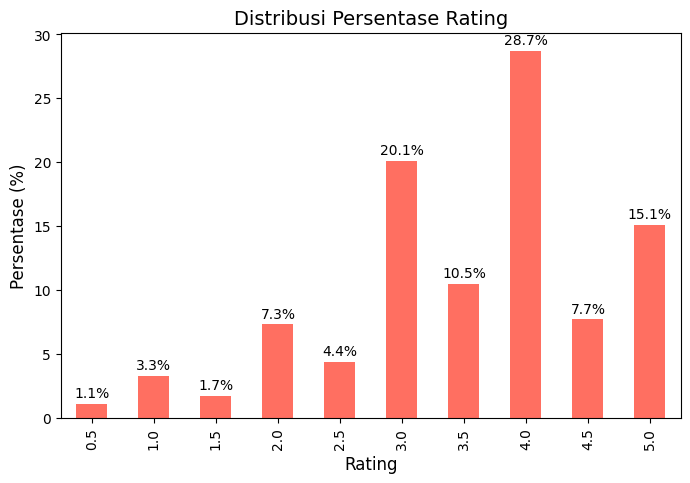

In [14]:
# Mengelompokkan data berdasarkan kolom 'rating' dan menghitung jumlah baris untuk tiap nilai rating
rating_counts = ratings.groupby('rating').size().to_frame('count')

# Menghitung persentase setiap nilai rating terhadap total keseluruhan
rating_counts['percentage'] = round((rating_counts['count'] / rating_counts['count'].sum()) * 100, 1)

# Membuat diagram batang untuk memvisualisasikan persentase rating
ax = rating_counts['percentage'].plot.bar(color='#FF6F61', figsize=(8, 5))

# Menambahkan label persentase di atas tiap batang
for i, val in enumerate(rating_counts['percentage']):
    plt.text(i, val + 0.5, f'{val}%', ha='center', fontsize=10)

# Memberi label pada sumbu dan judul grafik
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.title('Distribusi Persentase Rating', fontsize=14)
plt.show()


Berdasarkan diagram distribusi rating di atas, terlihat bahwa nilai rating yang paling sering diberikan pengguna adalah 4.0 dengan persentase 28,7%, diikuti oleh rating 3.0 sebesar 20,1%, dan rating 5.0 sebesar 15,1%. Nilai rating lainnya memiliki persentase di bawah 12,0%.


### Sebaran Genre Film


Pada tahap ini, kita akan membersihkan, memproses, dan menormalkan data dalam kolom `genres` pada DataFrame `df_movies`. Beberapa fungsi yang digunakan adalah:

- `fillna('[]')`: Mengisi nilai `null` atau `NaN` pada kolom `genres` dengan string kosong berbentuk list ('[]').
- `apply(literal_eval)`: Menggunakan fungsi `literal_eval` dari modul `ast` untuk mengubah string yang menyerupai literal Python menjadi tipe data `list`.
- `apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])`: Fungsi lambda ini memproses setiap elemen dalam kolom `genres` dengan cara berikut:
  - Jika nilai merupakan sebuah list (`isinstance(x, list)`), maka diambil nilai dari kunci `name` untuk setiap item di dalam list tersebut.
  - Jika bukan list, maka mengembalikan list kosong (`[]`).


Langkah awal, kita buat sebuah variabel DataFrame baru untuk keperluan analisis dan visualisasi data. Selanjutnya, kita konversi fitur (variabel) `genres` ke dalam format list agar dapat dianalisis dengan lebih mudah.


In [15]:
df_analisis_movies = movies.copy()
df_analisis_movies['genres'] = df_analisis_movies['genres'].fillna('[]') \
    .apply(literal_eval) \
    .apply(lambda x: [genre['name'] for genre in x] if isinstance(x, list) else [])


Selanjutnya, kita memecah setiap elemen dalam daftar genre menjadi baris terpisah menggunakan fungsi explode(). Kemudian, kita hitung frekuensi kemunculan setiap genre dengan value_counts(). Terakhir, kita buat diagram batang untuk memvisualisasikan distribusi genre menggunakan plot(kind='bar').

Distribusi Genre:
genres
Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions               

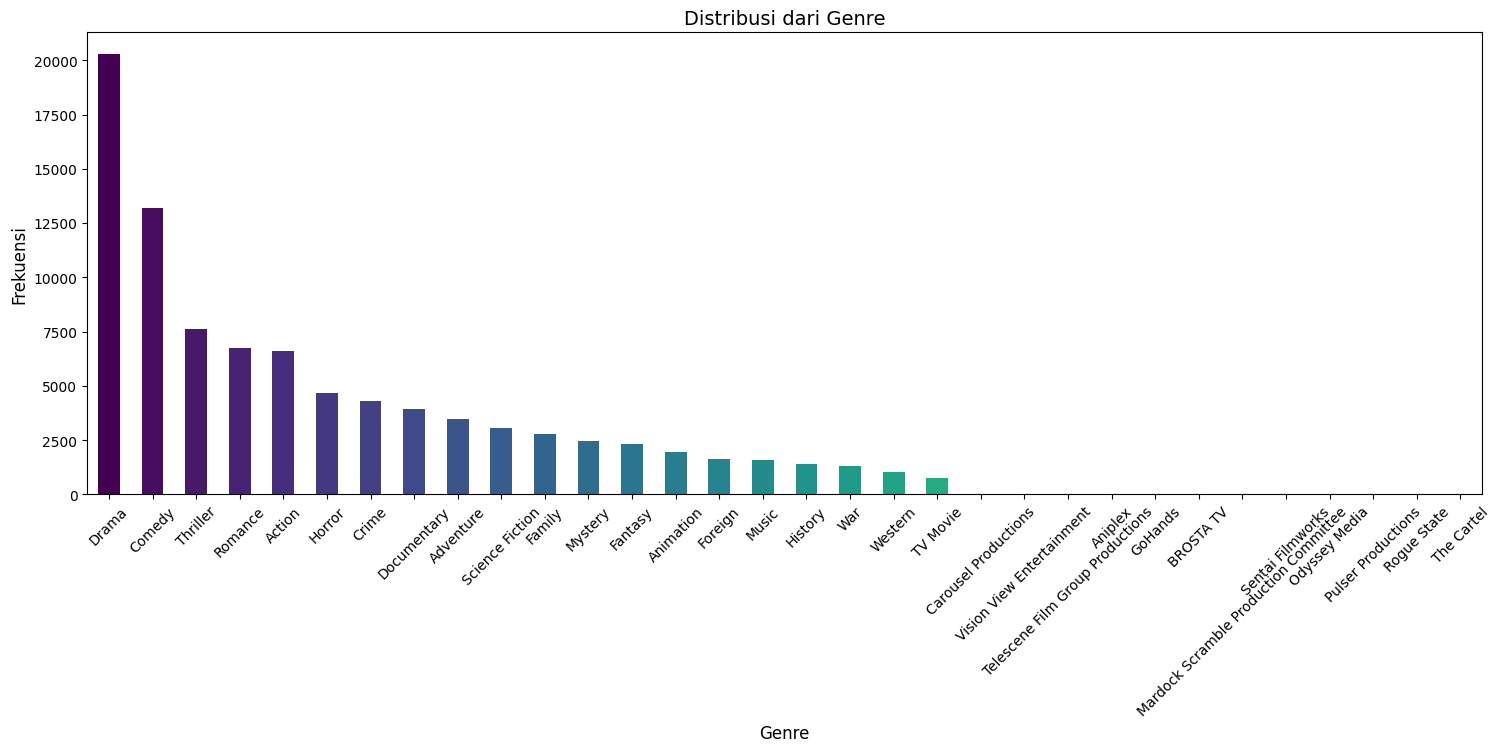

In [18]:
all_genres = df_analisis_movies['genres'].explode()
genre_counts = all_genres.value_counts()

print("Distribusi Genre:")
print(genre_counts)

colors = plt.cm.viridis(np.linspace(0, 1, len(genre_counts)))

plt.figure(figsize=(18, 6))
genre_counts.plot(kind='bar', color=colors)
plt.title('Distribusi dari Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik tersebut, dapat diamati bahwa genre Drama dan Comedy merupakan genre yang paling banyak muncul dalam dataset, dengan jumlah masing-masing sebanyak 20.265 dan 13.182 film. Sementara itu, genre-genre lainnya memiliki jumlah di bawah 10.000. Selain itu, terdapat 12 genre yang hanya muncul sebanyak 1 kali saja.

### Analisis Film dengan Skor Tertinggi di Seluruh Periode

Untuk membuat daftar film dengan skor tertinggi, digunakan metode Weighted Score. Metode ini menghitung skor berbobot dengan menggabungkan beberapa nilai berdasarkan tingkat kepentingannya.

Dalam konteks film, skor berbobot dihitung menggunakan beberapa parameter:

Rata-rata penilaian film (vote_average)

Jumlah suara yang diberikan pada film tersebut (vote_count)

Ambang batas jumlah suara minimum yang harus dipenuhi agar film dapat dipertimbangkan dalam daftar (threshold)

Keterangan variabel:

v = jumlah suara untuk film tertentu (vote_count)

m = jumlah suara minimum agar film bisa masuk daftar (threshold)

R = rata-rata skor film (vote_average)

C = rata-rata skor seluruh film dalam dataset (rata-rata global)



In [19]:
# Hitung rata-rata skor global (C)
C = df_analisis_movies['vote_average'].mean()

# Ambil kolom rata-rata skor (R) dan jumlah suara (v)
R = df_analisis_movies['vote_average']
v = df_analisis_movies['vote_count']

# Tentukan threshold suara minimum (m) sebagai persentil ke-75
m = df_analisis_movies['vote_count'].quantile(0.75)

# Hitung Weighted Score menggunakan rumus berbobot
df_analisis_movies['weighted_score'] = (v / (v + m)) * R + (m / (v + m)) * C

# Urutkan film berdasarkan weighted_score dari tertinggi ke terendah
top_movies = df_analisis_movies.sort_values(by='weighted_score', ascending=False)

# Tampilkan 5 film teratas berdasarkan weighted score
print("Daftar 5 Film dengan Skor Tertinggi:")
top_movies[['id', 'genres', 'title', 'vote_average', 'vote_count', 'weighted_score']].head(5)


Daftar 5 Film dengan Skor Tertinggi:


,id,genres,title,vote_average,vote_count,weighted_score
10309,19404,"[Comedy, Drama, Romance]",Dilwale Dulhania Le Jayenge,9.1,661.0,8.929668
314,278,"[Drama, Crime]",The Shawshank Redemption,8.5,8358.0,8.488324
834,238,"[Drama, Crime]",The Godfather,8.5,6024.0,8.483826
40251,372058,"[Romance, Animation, Drama]",Your Name.,8.5,1030.0,8.407913
12481,155,"[Drama, Action, Crime, Thriller]",The Dark Knight,8.3,12269.0,8.292589


Pada tabel di atas tercantum 5 film teratas dengan nilai skor tertinggi yang diberikan oleh para pengguna.

### Analisis Film dengan Rating Tertinggi

Selanjutnya, kita akan menggabungkan dataset df_movies dan ratings menggunakan fungsi pd.merge dari pandas. Setelah penggabungan, kita akan mencari 10 film dengan rating tertinggi.

In [20]:
# Buat salinan dataset movies untuk analisis agar data asli tidak berubah
movies_copy = movies.copy()

# Filter hanya data dengan 'id' yang berupa angka valid
movies_copy = movies_copy[movies_copy['id'].apply(lambda x: str(x).isnumeric())]

# Ubah tipe data kolom 'id' menjadi integer 64-bit
movies_copy['id'] = movies_copy['id'].astype('int64')

# Ganti nama kolom 'id' menjadi 'movieId' agar sesuai dengan dataset ratings
movies_copy.rename(columns={'id': 'movieId'}, inplace=True)

# Salin hasil pembersihan ke variabel baru
df_movies = movies_copy.copy()

# Gabungkan dataset ratings dengan df_movies berdasarkan 'movieId'
rating_movies = pd.merge(ratings, df_movies, on='movieId', how='inner')

# Hapus kolom yang tidak diperlukan
rating_movies.drop(columns=['timestamp', 'genres'], inplace=True)

# Hitung rata-rata rating dan total jumlah rating per judul film
df_analisis_rating = rating_movies.groupby('title')['rating'].agg(['mean', 'count']).reset_index()

# Ganti nama kolom agar lebih deskriptif
df_analisis_rating.rename(columns={'mean': 'mean ratings', 'count': 'total ratings'}, inplace=True)

# Tampilkan 10 film dengan jumlah rating terbanyak
df_analisis_rating.sort_values('total ratings', ascending=False).head(10)


<ipython-input-20-aa6d2ae14553>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_copy['id'] = movies_copy['id'].astype('int64')
<ipython-input-20-aa6d2ae14553>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_copy.rename(columns={'id': 'movieId'}, inplace=True)


,title,mean ratings,total ratings
1959,Terminator 3: Rise of the Machines,4.256173,324
2306,The Million Dollar Hotel,4.487138,311
1837,Solaris,4.134426,305
1967,The 39 Steps,4.221649,291
1374,Monsoon Wedding,3.706204,274
1506,Once Were Warriors,4.303279,244
2549,Three Colors: Red,3.945175,228
1331,Men in Black II,4.256696,224
2354,The Passion of Joan of Arc,3.483945,218
1807,Silent Hill,3.674419,215


Dari 10 film dengan rating tertinggi, Terminator 3: Rise of the Machines menempati posisi teratas dengan rata-rata rating sebesar 4.256 dan jumlah total rating mencapai 324.

### Perbandingan Rata-Rata Peringkat dan Total Jumlah Peringkat

Pada tahap ini, kita akan membandingkan rata-rata peringkat dan total peringkat menggunakan visualisasi jointplot. Tujuannya adalah untuk melihat sebaran dan hubungan antara kedua variabel tersebut secara lebih mendetail.

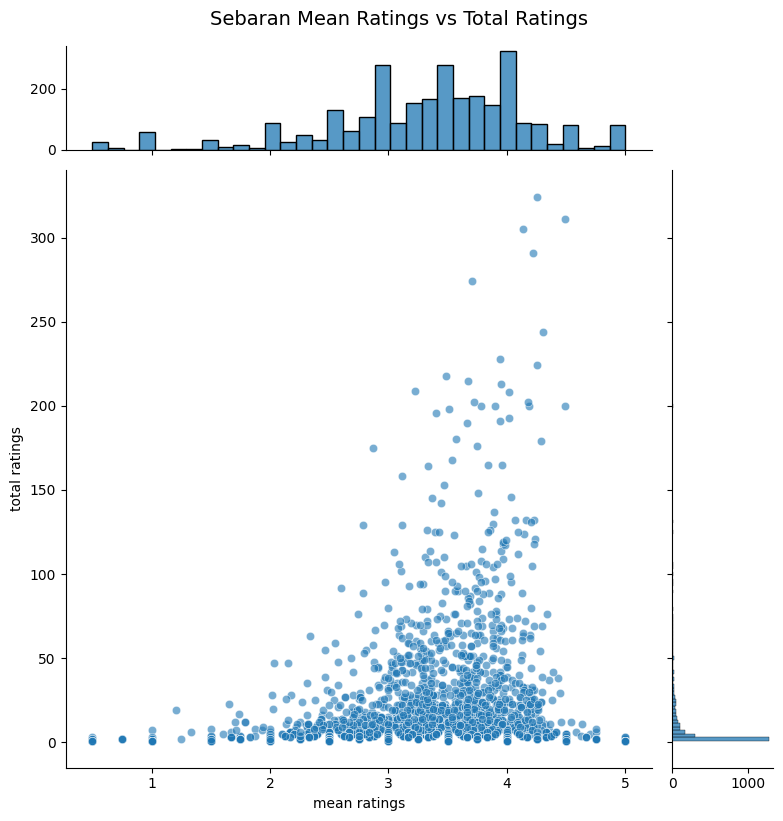

In [23]:

sns.jointplot(
    data=df_analisis_rating,
    x='mean ratings',
    y='total ratings',
    kind='scatter',      # jenis plot (scatter plot)
    height=8,            # ukuran plot
    marginal_ticks=True, # menampilkan ticks di histogram marginal
    alpha=0.6            # transparansi titik
)

plt.suptitle('Sebaran Mean Ratings vs Total Ratings', y=1.02, fontsize=14)
plt.show()


Berdasarkan grafik sebaran di atas, terdapat 5 film yang memiliki total rating lebih dari 250. Sementara itu, mayoritas pengguna memberikan rating film dalam rentang nilai antara 2 hingga 4.5.

# DATA PREPARATION

## Data Clean
Tahap ini bertujuan untuk mempersiapkan data mentah agar siap digunakan secara optimal dalam model machine learning. Setelah data dikumpulkan, terdapat beberapa langkah penting yang perlu dilakukan dalam proses ini, yaitu:

### Ekstraksi Fitur untuk Keperluan Model

Pada tahap ini, kita memilih beberapa fitur atau kolom dari variabel movies yang relevan untuk analisis dan pengolahan data, yaitu: ['id', 'genres', 'title', 'vote_average', 'vote_count']. Hasil seleksi fitur tersebut kemudian disimpan dalam variabel baru bernama df_movies.



In [24]:
# Menentukan fitur yang relevan untuk analisis
selected_columns = ['id', 'genres', 'title', 'vote_average', 'vote_count']

# Membuat DataFrame baru hanya dengan kolom yang dipilih
df_movies = movies[selected_columns].copy()

# Menampilkan 5 baris pertama dari DataFrame hasil seleksi
df_movies.head()


,id,genres,title,vote_average,vote_count
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,7.7,5415.0
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,6.9,2413.0
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,6.5,92.0
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,6.1,34.0
4,11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,5.7,173.0


### Penyesuaian Tipe Data untuk Primary Key dan Foreign Key

Berdasarkan informasi sebelumnya, atribut id pada dataset movies yang berfungsi sebagai primary key memiliki tipe data object, sedangkan pada dataset ratings, atribut yang berelasi yaitu movieId bertipe int64. Oleh karena itu, perlu dilakukan penyesuaian dengan menyamakan nama kolom menjadi movieId dan mengubah tipe data menjadi int64 agar keduanya dapat digabungkan dengan benar.



In [25]:
# Salin dataset df_movies untuk menghindari perubahan data asli
df_movies_cleaned = df_movies.copy()

# Filter baris dengan nilai 'id' yang valid (hanya angka)
df_movies_cleaned = df_movies_cleaned[df_movies_cleaned['id'].apply(lambda x: str(x).isnumeric())]

# Ubah tipe data kolom 'id' menjadi int64
df_movies_cleaned['id'] = df_movies_cleaned['id'].astype('int64')

# Ubah nama kolom 'id' menjadi 'movieId' untuk konsistensi dengan dataset lain
df_movies_cleaned.rename(columns={'id': 'movieId'}, inplace=True)

# Simpan hasil akhir ke df_movies
df_movies = df_movies_cleaned.copy()


### Menangani Missing Value

Pada tahap ini, kita akan melakukan pengecekan terhadap nilai kosong (missing values) pada variabel dataset df_movies dan ratings.

In [26]:
# Mengecek jumlah nilai kosong pada setiap kolom di dataset df_movies
df_movies.isnull().sum()


,0
movieId,0
genres,0
title,3
vote_average,3
vote_count,3


Dari hasil pengecekan tersebut, ditemukan bahwa kolom title, vote_average, dan vote_count masing-masing memiliki 3 nilai kosong (null).



In [27]:
# Menampilkan baris pada df_movies yang mengandung setidaknya satu nilai null
df_movies[df_movies.isnull().any(axis=1)]


,movieId,genres,title,vote_average,vote_count
19729,82663,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,NaN,NaN
29502,122662,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",NaN,NaN,NaN
35586,249260,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,NaN,NaN


Dari hasil tersebut, terlihat bahwa terdapat beberapa baris dengan nilai kosong pada variabel dataset df_movies.

In [28]:
df_movies = df_movies.dropna(subset=['title', 'vote_average', 'vote_count'])
df_movies.isnull().sum()

,0
movieId,0
genres,0
title,0
vote_average,0
vote_count,0


In [29]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


### Memeriksa Duplikasi pada Dataset

 periksa variabel dataset df_movies

In [30]:
# Menghitung jumlah baris duplikat dalam DataFrame df_movies
duplicate_count = df_movies.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")


Jumlah data duplikat: 28


Menampilkan baris-baris yang duplikat berdasarkan semua kolom


In [31]:
# Menampilkan movies duplikat
duplicate_rows = df_movies[df_movies.duplicated(keep=False)]
print(duplicate_rows)


       movieId                                             genres  \
676     105045  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
838     132641                      [{'id': 18, 'name': 'Drama'}]   
949      22649  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
1465    105045  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
2564     84198                [{'id': 99, 'name': 'Documentary'}]   
4356    110428                      [{'id': 18, 'name': 'Drama'}]   
5535     12600  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
5710    109962                      [{'id': 18, 'name': 'Drama'}]   
5865      4912  [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...   
7345      5511  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
8068     23305  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
9165      5511  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
9327     23305  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
9576     69234  [{'id': 18, 'name'

Dari hasil tersebut, dapat dilihat bahwa beberapa data memang mengalami duplikasi.

In [ ]:
df_movies.drop_duplicates(inplace = True)

Periksa dataset ratings yang duplikat

In [32]:
ratings.duplicated().sum()

np.int64(0)

Karena hasil yang ditampilkan adalah 0, dapat disimpulkan bahwa tidak terdapat data duplikat pada dataset ratings.

## Data Preprocessing
Tahap ini bertujuan untuk mempersiapkan data mentah agar siap digunakan secara efektif dalam model machine learning. Langkah-langkah yang dilakukan dalam proyek ini meliputi:

- Mengurutkan data pengguna dan film berdasarkan ID masing-masing

- Mengubah fitur genres pada data film menjadi format list

- Menggabungkan dataset ratings dan movies menjadi satu dataset terpadu

- Menghapus fitur atau kolom yang tidak diperlukan untuk analisis

- Memilih subset dataset yang sesuai dengan kebutuhan analisis dan pemodelan



# Mengurutkan dataset ratings berdasarkan userId secara ascending
ratings_sorted = ratings.sort_values(by='userId').reset_index(drop=True)


In [33]:
ratings   = ratings.sort_values('userId')
df_movies = df_movies.sort_values('movieId')

In [34]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
12,1,1953,4.0,1260759191


In [35]:
df_movies.head()

,movieId,genres,title,vote_average,vote_count
4342,2,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",Ariel,7.1,44.0
12947,3,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",Shadows in Paradise,7.1,35.0
17,5,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",Four Rooms,6.5,539.0
474,6,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Judgment Night,6.4,79.0
256,11,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Star Wars,8.1,6778.0


### Mengubah fitur genres movie ke bentuk list

In [36]:
# Mengisi nilai kosong pada kolom 'genres' dengan string kosong '[]'
# Mengonversi string representasi list menjadi list Python asli menggunakan literal_eval
# Ekstrak nama genre dari setiap elemen (asumsi tiap elemen adalah dict dengan key 'name')
df_movies['genres'] = df_movies['genres'].fillna('[]').apply(literal_eval).apply(
    lambda x: [genre['name'] for genre in x] if isinstance(x, list) else []
)

# Menampilkan kolom genres hasil konversi
df_movies['genres']

,genres
4342,"[Drama, Crime]"
12947,"[Drama, Comedy]"
17,"[Crime, Comedy]"
474,"[Action, Thriller, Crime]"
256,"[Adventure, Action, Science Fiction]"
...,...
45078,"[Fantasy, Drama]"
45273,[Drama]
21891,"[Drama, Romance]"
45398,"[Romance, Comedy]"


### Penggabungan Data

 mengabungkan dataset ratings dan dataset movies menggunakan fungsi `merge` dan mengahapus variabel `timestamp` yang dibutuhkan.

In [37]:
# Menggabungkan dataset ratings dan df_movies berdasarkan kolom 'movieId'
df_movies_ratings = pd.merge(ratings, df_movies, on='movieId', how='inner')

# Menampilkan 5 baris pertama hasil penggabungan
df_movies_ratings.head()


,userId,movieId,rating,timestamp,genres,title,vote_average,vote_count
0,1,2193,2.0,1260759198,"[Comedy, Drama, Romance]",My Tutor,5.8,17.0
1,1,2105,4.0,1260759139,"[Comedy, Romance]",American Pie,6.4,2358.0
2,1,1371,2.5,1260759135,[Drama],Rocky III,6.6,894.0
3,1,1405,1.0,1260759203,"[Drama, History]",Greed,7.5,25.0
4,1,2455,2.5,1260759113,"[Drama, Comedy, Crime]",Confidentially Yours,7.1,25.0


### Menghapus fitur yang tidak diperlukan

menghapus fitur-firur yang tidak diperlukan yaitu `timestamp`, `vote_average` dan `vote_count`.

In [38]:
df_movies_ratings.drop(['timestamp', 'vote_average', 'vote_count'],axis=1, inplace=True)

menggunakan fungsi `head` untuk melihat hasilnya.

In [39]:
df_movies_ratings.head(10)

,userId,movieId,rating,genres,title
0,1,2193,2.0,"[Comedy, Drama, Romance]",My Tutor
1,1,2105,4.0,"[Comedy, Romance]",American Pie
2,1,1371,2.5,[Drama],Rocky III
3,1,1405,1.0,"[Drama, History]",Greed
4,1,2455,2.5,"[Drama, Comedy, Crime]",Confidentially Yours
5,1,2294,2.0,[Comedy],Jay and Silent Bob Strike Back
6,2,410,3.0,"[Comedy, Drama]",Summer in Berlin
7,2,454,4.0,"[Drama, Romance]",Romeo + Juliet
8,2,661,4.0,"[War, Drama]",The Marriage of Maria Braun
9,2,405,2.0,[Drama],La Strada


### Memilih Data yang Relevan untuk Analisis

Pada tahap ini, kita melakukan sampling acak sebanyak 20.000 data dari gabungan dataset movies dan ratings menggunakan fungsi shuffle dari sklearn.utils. Teknik ini bertujuan untuk mempermudah proses pengolahan data dan menghindari kemungkinan crash akibat ukuran dataset yang terlalu besar.

In [40]:
from sklearn.utils import shuffle

# Mengacak dataset gabungan dan mengambil 20.000 baris pertama sebagai sample
df_sample_final = shuffle(df_movies_ratings).head(20000)

# Menampilkan hasil sample
df_sample_final


,userId,movieId,rating,genres,title
34767,534,2501,4.0,"[Action, Drama, Mystery, Thriller]",The Bourne Identity
29223,461,2288,2.5,"[Drama, Romance]",Closer
3856,57,2313,5.0,"[Comedy, Drama, Romance]",Prime
3991,61,46972,4.0,"[Comedy, Drama, Family]",Big Girls Don't Cry... They Get Even
40627,598,919,4.0,"[Fantasy, Animation, Horror, Comedy, Thriller,...",Blood: The Last Vampire
...,...,...,...,...,...
35934,547,1913,4.5,[Drama],The Sea Inside
43621,649,468,3.0,"[Drama, Romance]",My Own Private Idaho
18451,294,2993,2.5,"[Mystery, Thriller]",One on Top of the Other
37101,562,163,4.0,"[Thriller, Crime]",Ocean's Twelve


# Content Based Filtering (CBF)

Content-Based Filtering adalah metode sistem rekomendasi yang menyarankan item dengan melihat kesamaan karakteristik atau fitur dari item yang sebelumnya disukai atau diberi nilai oleh pengguna.

## A. Data Preparation

Teknik yang diterapkan adalah TF-IDF (Term Frequency-Inverse Document Frequency), yang digunakan untuk memberi bobot pada fitur dan menghitung tingkat kemiripan antar item. Pada proyek ini, fitur yang digunakan sebagai item adalah genre film (genres).

 pertama periksa datset kita sesuai dengan kebutuhan yang kita inginkan dengan fungsi `info()`

In [41]:
df_sample_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 34767 to 33268
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   20000 non-null  int64  
 1   movieId  20000 non-null  int64  
 2   rating   20000 non-null  float64
 3   genres   20000 non-null  object 
 4   title    20000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 937.5+ KB


Dapat dilihat bahwa dataset kita berisi 20.000 baris dan 5 kolom, dengan komposisi tipe data berupa 1 kolom bertipe float64, 2 kolom bertipe int64, serta 2 kolom bertipe object.

Selanjutnya, kita lanjut ke tahap persiapan dengan membuat variabel preparation yang berisi DataFrame df_sample_final, lalu mengurutkannya berdasarkan kolom movieId.

In [42]:
preparation = df_sample_final
preparation.sort_values('movieId')

,userId,movieId,rating,genres,title
5702,85,2,5.0,"[Drama, Crime]",Ariel
26217,418,2,2.0,"[Drama, Crime]",Ariel
27644,442,2,4.0,"[Drama, Crime]",Ariel
27501,440,2,4.0,"[Drama, Crime]",Ariel
4361,69,2,3.5,"[Drama, Crime]",Ariel
...,...,...,...,...,...
35733,547,134881,4.0,[Comedy],More of Me
35737,547,140174,4.0,"[Action, Horror, Thriller]",Rise of the Zombies
583,15,140174,4.0,"[Action, Horror, Thriller]",Rise of the Zombies
582,15,142507,3.0,[Drama],Exit


In [43]:
# Menghapus baris duplikat berdasarkan kolom 'movieId' pada DataFrame preparation
preparation = preparation.drop_duplicates(subset='movieId')

# Menampilkan DataFrame hasil penghapusan duplikat
preparation


,userId,movieId,rating,genres,title
34767,534,2501,4.0,"[Action, Drama, Mystery, Thriller]",The Bourne Identity
29223,461,2288,2.5,"[Drama, Romance]",Closer
3856,57,2313,5.0,"[Comedy, Drama, Romance]",Prime
3991,61,46972,4.0,"[Comedy, Drama, Family]",Big Girls Don't Cry... They Get Even
40627,598,919,4.0,"[Fantasy, Animation, Horror, Comedy, Thriller,...",Blood: The Last Vampire
...,...,...,...,...,...
24575,388,4688,5.0,"[Adventure, Drama, Music, Romance]",Across the Universe
18826,299,26326,5.0,"[Comedy, Music]",Rock 'n' Roll High School
39281,580,4614,3.0,"[Thriller, Action, Drama]",The Sum of All Fears
44317,659,167,4.0,"[Drama, Science Fiction]",K-PAX


Selanjutnya, kita akan mengubah data dalam bentuk series menjadi list menggunakan fungsi tolist() dari library numpy.

In [47]:
# Mengonversi kolom 'movieId', 'title', dan 'genres' dari DataFrame preparation menjadi list
movie_id = preparation['movieId'].tolist()
movie_name = preparation['title'].tolist()
movie_genres = preparation['genres'].tolist()

# Menampilkan panjang masing-masing list untuk memastikan kesamaan jumlah data
print(len(movie_id))
print(len(movie_name))
print(len(movie_genres))


2266
2266
2266


Selanjutnya, kita akan membuat dictionary yang memetakan pasangan key-value menggunakan data movie_id, movie_name, dan movie_genres yang sudah kita siapkan sebelumnya.

In [48]:
# Membuat DataFrame baru dari list movie_id, movie_name, dan movie_genres
movies_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genres': movie_genres
})

# Menampilkan DataFrame yang telah dibuat
movies_new


,id,movie_name,genres
0,2501,The Bourne Identity,"[Action, Drama, Mystery, Thriller]"
1,2288,Closer,"[Drama, Romance]"
2,2313,Prime,"[Comedy, Drama, Romance]"
3,46972,Big Girls Don't Cry... They Get Even,"[Comedy, Drama, Family]"
4,919,Blood: The Last Vampire,"[Fantasy, Animation, Horror, Comedy, Thriller,..."
...,...,...,...
2261,4688,Across the Universe,"[Adventure, Drama, Music, Romance]"
2262,26326,Rock 'n' Roll High School,"[Comedy, Music]"
2263,4614,The Sum of All Fears,"[Thriller, Action, Drama]"
2264,167,K-PAX,"[Drama, Science Fiction]"


Selanjutnya, kita akan menggunakan fungsi TfidfVectorizer untuk mengubah data genres. Namun sebelum itu, kita perlu mengonversi genres yang berbentuk list menjadi string agar bisa diproses.

In [49]:
data = movies_new.copy()

# Mengubah kolom 'genres' dari list menjadi string dengan pemisah koma
data['genres'] = data['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TfidfVectorizer
tf_cbf = TfidfVectorizer()

# Melatih vectorizer pada data kolom 'genres'
tf_cbf.fit(data['genres'])

# Mendapatkan daftar fitur (nama-nama genre) hasil ekstraksi
features = tf_cbf.get_feature_names_out()
features


array(['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance',
       'science', 'thriller', 'tv', 'war', 'western'], dtype=object)

Setelah memperoleh indeks seluruh genre film, data tersebut akan di-fit dan kemudian diubah menjadi bentuk matriks menggunakan transformasi.

In [51]:
# Melatih TfidfVectorizer dan mengubah data 'genres' menjadi matriks TF-IDF
tfidf_matrix = tf_cbf.fit_transform(data['genres'])

# Menampilkan dimensi matriks TF-IDF (jumlah film, jumlah fitur genre)
print(tfidf_matrix.shape)


(2266, 22)


Setelah proses fit dan transformasi, diperoleh matriks berukuran (2266 x 22). Langkah berikutnya adalah mengubah vektor TF-IDF tersebut menjadi matriks padat menggunakan fungsi todense().

In [52]:
# Mengonversi matriks TF-IDF yang berbentuk sparse matrix menjadi matriks padat (dense matrix)
dense_tfidf_matrix = tfidf_matrix.todense()
dense_tfidf_matrix


matrix([[0.50257773, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.67593863, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.50964893, 0.58724585, 0.        , ..., 0.        , 0.        ,
         0.        ]])

Setelah matriks terbentuk, kita buat sebuah tabel yang memuat judul film beserta genre-nya berdasarkan representasi TF-IDF yang telah dibuat sebelumnya.

In [53]:
# Membuat DataFrame yang menampilkan bobot TF-IDF untuk setiap genre pada tiap film
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf_cbf.get_feature_names_out(),
    index=data['movie_name']
)

tfidf_df.head()


,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
movie_name,,,,,,,,,,,,,,,,,,,,,
The Bourne Identity,0.502578,0.0,0.000000,0.000000,0.0,0.0,0.305445,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.668707,0.000000,0.000000,0.454917,0.0,0.0,0.0
Closer,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.519032,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.854755,0.000000,0.000000,0.0,0.0,0.0
Prime,0.000000,0.0,0.000000,0.578300,0.0,0.0,0.423439,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.697330,0.000000,0.000000,0.0,0.0,0.0
Big Girls Don't Cry... They Get Even,0.000000,0.0,0.000000,0.459828,0.0,0.0,0.336692,0.821704,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Blood: The Last Vampire,0.000000,0.0,0.541904,0.253116,0.0,0.0,0.000000,0.000000,0.403852,0.360042,...,0.379109,0.0,0.0,0.000000,0.000000,0.360042,0.276029,0.0,0.0,0.0


## B. Modeling

Pada tahap ini, digunakan metode Cosine Similarity untuk mengukur tingkat kesamaan antara dua vektor dalam ruang multidimensi. Dalam proyek ini, metode tersebut diterapkan pada sistem rekomendasi Content-Based Filtering untuk memberikan rekomendasi film berdasarkan kesamaan genre yang telah disukai atau dinilai pengguna.

Nilai Cosine Similarity berada dalam rentang 0 hingga 1, di mana nilai 0 menunjukkan dua dokumen sama sekali tidak mirip, dan nilai 1 berarti kedua dokumen tersebut sangat mirip. Nilai ini berlaku dalam ruang berdimensi tinggi.

Untuk menerapkan content-based filtering dalam proyek ini, digunakan metode cosine similarity untuk mengukur kemiripan antar film berdasarkan fitur genre.



In [54]:
# Menghitung cosine similarity pada matriks tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)

# Menampilkan matriks cosine similarity
cosine_sim


array([[1.        , 0.15853594, 0.12933745, ..., 0.74352568, 0.10447338,
        0.35074781],
       [0.15853594, 1.        , 0.81582419, ..., 0.21322187, 0.17752765,
        0.16076651],
       [0.12933745, 0.81582419, 1.        , ..., 0.17395156, 0.14483135,
        0.13115721],
       ...,
       [0.74352568, 0.21322187, 0.17395156, ..., 1.        , 0.14051079,
        0.47173597],
       [0.10447338, 0.17752765, 0.14483135, ..., 0.14051079, 1.        ,
        0.1059433 ],
       [0.35074781, 0.16076651, 0.13115721, ..., 0.47173597, 0.1059433 ,
        1.        ]])

In [55]:
# Menghitung cosine similarity dan menyimpan dalam DataFrame dengan indeks dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data["movie_name"], columns=data["movie_name"])
print('Shape:', cosine_sim_df.shape)

# Menampilkan sampel 10 film secara acak pada baris dan kolom dari matriks similarity
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)


Shape: (2266, 2266)


movie_name,Ghost,Das Boot,Vampire's Kiss,No Country for Old Men,Edge of Seventeen,Apollo 13,Sun Alley,Eye of the Devil,Casino,Samurai II: Duel at Ichijoji Temple
movie_name,,,,,,,,,,
The First Wives Club,0.000000,0.000000,0.555272,0.000000,0.578300,0.000000,1.000000,0.000000,0.000000,0.000000
Fever Pitch,0.322276,0.000000,0.354460,0.000000,0.905925,0.000000,0.638353,0.000000,0.000000,0.000000
The Most Dangerous Game,0.178361,0.247559,0.538054,0.278636,0.000000,0.000000,0.000000,0.380467,0.000000,0.420716
Predator 2,0.159676,0.166925,0.000000,0.249447,0.000000,0.000000,0.000000,0.000000,0.000000,0.283683
Murder in Three Acts,0.493280,0.072934,0.000000,0.548232,0.141823,0.334932,0.000000,0.762083,0.679945,0.123949
Get Carter,0.244052,0.000000,0.000000,0.917746,0.000000,0.000000,0.000000,0.388347,0.665379,0.000000
The Mist,0.150987,0.000000,0.455478,0.235873,0.000000,0.000000,0.000000,0.322076,0.000000,0.000000
Sliver,0.456079,0.121386,0.000000,0.712489,0.236040,0.557436,0.000000,0.000000,0.274586,0.206291
Brazil,0.000000,0.000000,0.247174,0.000000,0.257425,0.000000,0.445141,0.000000,0.000000,0.000000


Berikutnya, kita akan membuat fungsi untuk merekomendasikan film berdasarkan kesamaan genre dengan menggunakan metode Top-N rekomendasi.

In [56]:
def recommend_movies(movie_title, similarity_matrix=cosine_sim_df, movie_info=data[['movie_name', 'genres']], top_k=10):
    # Dapatkan indeks film berdasarkan skor kemiripan tertinggi
    indices = similarity_matrix[movie_title].to_numpy().argpartition(range(-1, -top_k - 1, -1))

    # Ambil nama-nama film dengan kemiripan tertinggi, kecuali film input
    similar_movies = similarity_matrix.columns[indices[-1:-(top_k+2):-1]].drop(movie_title, errors='ignore')

    # Gabungkan dengan data info film dan ambil top_k film
    return pd.DataFrame(similar_movies, columns=['movie_name']).merge(movie_info, on='movie_name').head(top_k)


## C. Uji Coba Sistem Rekomendasi

Di tahap ini, kita akan melakukan evaluasi terhadap model yang telah dibuat.

In [58]:
data[data.movie_name.eq('Made in Hong Kong')]


,id,movie_name,genres
1895,26005,Made in Hong Kong,"Crime, Drama, Romance"


In [61]:
# Mendapatkan rekomendasi film yang mirip dengan yang dipilih
recommended_movies = recommend_movies('Made in Hong Kong')
recommended_movies

,movie_name,genres
0,The Thomas Crown Affair,"Romance, Crime, Thriller, Drama"
1,The Thomas Crown Affair,"Drama, Crime, Romance"
2,3-Iron,"Drama, Romance, Crime"
3,Angel Face,"Crime, Drama, Romance"
4,The Little Thief,"Romance, Drama, Crime"
5,Schizo,"Crime, Drama, Romance"
6,The Man with the Golden Arm,"Crime, Drama, Romance"
7,Tie Me Up! Tie Me Down!,"Comedy, Crime, Drama, Romance"
8,Music Box,"Crime, Drama, Romance, Thriller"
9,Match Point,"Drama, Thriller, Crime, Romance"


Hasil yang diperoleh berupa daftar judul film yang memiliki kesamaan genre dengan film yang dipilih.

## D. Evaluation

Pada tahap evaluasi model, digunakan metrik precision untuk mengukur proporsi prediksi positif yang benar (True Positives) dari keseluruhan prediksi positif (True Positives ditambah False Positives).

In [62]:
relevant_genres = {"Crime", "Drama", "Romance"}  # menggunakan set agar urutan tidak berpengaruh

def check_relevance(genres_str):
    genre_set = set(genres_str.split(', '))
    return relevant_genres.issubset(genre_set)

recommended_movies['is_relevant'] = recommended_movies['genres'].apply(check_relevance)

true_positives = recommended_movies['is_relevant'].sum()
total_recommended = len(recommended_movies)

precision = (true_positives / total_recommended) * 100
print(f"Precision: {precision:.2f}%")


Precision: 100.00%


Dari hasil tersebut, metrik precision mencapai 100.00% untuk 10 film yang direkomendasikan berdasarkan kesamaan genre.

# Collaborative Filtering (CF)

Model-Based Deep Learning Collaborative Filtering merupakan metode yang mengintegrasikan teknik collaborative filtering dengan deep learning guna meningkatkan akurasi dan performa sistem rekomendasi. Tahap ini melibatkan beberapa langkah persiapan penting sebelum pelatihan model, yang dapat dijelaskan sebagai berikut:

## A. Data Preparation

periksacek dataset kita dengan fungsi `info()`

In [63]:
df_sample_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 34767 to 33268
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   20000 non-null  int64  
 1   movieId  20000 non-null  int64  
 2   rating   20000 non-null  float64
 3   genres   20000 non-null  object 
 4   title    20000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 937.5+ KB


Berdasarkan hasil tersebut, dataset berisi 20.000 baris dan 5 kolom dengan komposisi tipe data terdiri dari 1 kolom bertipe float64, 2 kolom bertipe int64, serta 2 kolom bertipe object.

 hapus kolom yang tidak dibutuhkan dalam pelatihan.

In [64]:
# Menghapus kolom 'title'
df_sample_final = df_sample_final.drop(columns=['genres', 'title'])

 urutkan berdasarkan kolom `userId`

In [65]:
df_sample_final = df_sample_final.sort_values('userId')

## Encoding untuk userId dan movieId

lakukan encoding pada `userId`

In [66]:
# Mendapatkan daftar unik userID
user_ids = df_sample_final['userId'].unique().tolist()
print('Daftar userID:', user_ids)

# Membuat mapping userID ke angka (encoding)
user_to_user_encoded = {user_id: idx for idx, user_id in enumerate(user_ids)}
print('UserID setelah encoding:', user_to_user_encoded)

# Membalik mapping dari angka ke userID asli
user_encoded_to_user = {idx: user_id for idx, user_id in enumerate(user_ids)}
print('Mapping angka ke userID:', user_encoded_to_user)


Daftar userID: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

selanjutnya,  lakukan hal yang sama pada `movieId`.

In [67]:
# Mendapatkan daftar unik movieId
movie_ids = df_sample_final['movieId'].unique().tolist()
print('Daftar movieId:', movie_ids)

# Membuat mapping movieId ke angka (encoding)
movie_to_movie_encoded = {movie_id: idx for idx, movie_id in enumerate(movie_ids)}
print('movieId setelah encoding:', movie_to_movie_encoded)

# Membalik mapping dari angka ke movieId asli
movie_encoded_to_movie = {idx: movie_id for idx, movie_id in enumerate(movie_ids)}
print('Mapping angka ke movieId:', movie_encoded_to_movie)


Daftar movieId: [2105, 2193, 2455, 1371, 144, 319, 165, 550, 17, 222, 225, 339, 590, 266, 248, 168, 364, 161, 272, 410, 153, 551, 110, 592, 261, 235, 273, 185, 300, 457, 866, 778, 1271, 1378, 527, 2028, 588, 593, 296, 1884, 318, 1376, 2064, 260, 2018, 910, 435, 3104, 2348, 1968, 141, 2770, 1377, 2289, 2094, 2788, 2268, 3060, 1089, 2034, 2640, 1257, 858, 616, 1387, 2087, 464, 2014, 2110, 903, 1265, 1967, 431, 2144, 440, 2263, 3210, 329, 3101, 2085, 2109, 3040, 2115, 1282, 5995, 8464, 1997, 1544, 277, 30793, 377, 2502, 500, 2023, 40819, 586, 1485, 3114, 2890, 3052, 8368, 2528, 1909, 1687, 293, 1250, 111, 1278, 1405, 480, 541, 786, 1372, 780, 594, 380, 333, 1394, 207, 539, 1408, 1961, 1393, 4226, 2791, 3578, 4993, 8873, 4973, 4034, 1259, 524, 805, 628, 26, 1682, 1721, 2140, 2291, 2762, 2294, 2539, 534, 1680, 1887, 2907, 2841, 152, 1719, 1690, 1923, 1358, 26614, 2042, 1918, 91548, 70, 169, 253, 1639, 2668, 3780, 673, 2959, 608, 3176, 3865, 2259, 2355, 4886, 3396, 919, 3175, 100032, 31685, 

Setelah proses encoding selesai, kita lakukan pemetaan userId dan movieId ke dalam dataframe yang relevan.

In [68]:
# Memetakan userId ke kolom 'user' pada dataframe
df_sample_final['user'] = df_sample_final['userId'].map(user_to_user_encoded)

# Memetakan movieId ke kolom 'movie' pada dataframe
df_sample_final['movie'] = df_sample_final['movieId'].map(movie_to_movie_encoded)


  ambil total_user, total movie dan nilai rating minimum dan maksimum untuk proses pembagian dataset sebelum melakukan pelatihan

In [69]:
# Menghitung total user
total_user = len(user_to_user_encoded)
print(total_user)

# Menghitung total movie
total_movies = len(movie_encoded_to_movie)
print(total_movies)

# Mengonversi kolom rating ke tipe float32
df_sample_final['rating'] = df_sample_final['rating'].astype(np.float32)

# Mendapatkan nilai rating minimum
min_rating = df_sample_final['rating'].min()

# Mendapatkan nilai rating maksimum
max_rating = df_sample_final['rating'].max()

print(f'Number of Users: {total_user}, Number of Movies: {total_movies}, Min Rating: {min_rating}, Max Rating: {max_rating}')


671
2266
Number of Users: 671, Number of Movies: 2266, Min Rating: 0.5, Max Rating: 5.0


Hasil tersebut menunjukkan bahwa dataset berisi 671 pengguna, 2266 film, dengan rentang rating mulai dari 0.5 hingga 5.0.

### Pembagian Data untuk Training dan Validasi

Pada tahap ini, kita akan membagi dataset menjadi data pelatihan dan data validasi untuk keperluan training model. Sebelum itu, dataset perlu diacak terlebih dahulu agar data validasi yang dihasilkan representatif.

In [71]:
# Mengacak dataset
df_sample_final = df_sample_final.sample(frac=1, random_state=42)
df_sample_final

,userId,movieId,rating,user,movie
14518,232,379,4.0,231,485
38105,564,1093,4.0,563,453
16782,266,296,3.0,265,38
39762,587,26663,4.0,586,2179
39152,580,1485,3.5,579,96
...,...,...,...,...,...
32691,509,214,4.0,508,1988
18117,292,1923,4.0,291,150
21551,346,2116,3.0,345,645
30774,475,3981,2.0,474,275


Selanjutnya, kita membuat variabel x yang berisi gabungan informasi antara data pengguna (user) dan film (movie) menjadi satu representasi nilai. Kemudian, variabel y digunakan untuk menyimpan nilai rating sebagai label. Terakhir, dataset dibagi menjadi 80% data pelatihan dan 20% data validasi.

In [72]:
# Membentuk fitur dari kolom 'user' dan 'movie'
features = df_sample_final[['user', 'movie']].values

# Menormalisasi rating ke rentang 0-1
labels = df_sample_final['rating'].apply(
    lambda rating: (rating - min_rating) / (max_rating - min_rating)
).values

# Menentukan batas indeks untuk pembagian data train dan validasi (80/20)
split_index = int(0.8 * len(df_sample_final))

# Membagi dataset menjadi data pelatihan dan validasi
x_train, x_val = features[:split_index], features[split_index:]
y_train, y_val = labels[:split_index], labels[split_index:]

# Menampilkan hasil akhir dari fitur dan label
print(features, labels)


[[231 485]
 [563 453]
 [265  38]
 ...
 [345 645]
 [474 275]
 [550 109]] [0.77777778 0.77777778 0.55555556 ... 0.55555556 0.33333333 0.55555556]


## B. Modeling

model akan menghitung tingkat kecocokan antara pengguna dan film menggunakan teknik embedding. Langkah pertama adalah menerapkan embedding pada data pengguna dan film secara terpisah. Setelah itu, kita melakukan operasi dot product antara hasil embedding pengguna dan film untuk mendapatkan skor interaksi mereka. Sebagai tambahan, kita juga menyisipkan bias khusus untuk masing-masing pengguna dan film guna meningkatkan akurasi prediksi.

Skor akhir kecocokan akan dipetakan ke rentang [0, 1] menggunakan fungsi aktivasi sigmoid, sehingga dapat ditafsirkan sebagai probabilitas. Untuk mengimplementasikan model ini, kita membangun sebuah kelas bernama RecommenderNet yang diturunkan dari kelas Model milik Keras.

In [73]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, total_users, total_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        self.total_users = total_users
        self.total_movies = total_movies
        self.embedding_size = embedding_size

        # Embedding untuk user
        self.user_embedding = layers.Embedding(
            input_dim=total_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(
            input_dim=total_users,
            output_dim=1
        )

        # Embedding untuk movie
        self.movie_embedding = layers.Embedding(
            input_dim=total_movies,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(
            input_dim=total_movies,
            output_dim=1
        )

    def call(self, inputs):
        user_ids = inputs[:, 0]
        movie_ids = inputs[:, 1]

        # Ambil embedding dan bias masing-masing
        user_vector = self.user_embedding(user_ids)
        user_bias = self.user_bias(user_ids)
        movie_vector = self.movie_embedding(movie_ids)
        movie_bias = self.movie_bias(movie_ids)

        # Hitung dot product antar embedding user dan movie
        interaction = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)

        # Tambahkan bias
        x = interaction + user_bias + movie_bias

        # Skor akhir (0 - 1) menggunakan sigmoid
        return tf.nn.sigmoid(x)


Selanjutnya, lakukan proses compile terhadap model.

In [74]:
# Inisialisasi model RecommenderNet dengan ukuran embedding 50
model = RecommenderNet(total_users=total_user, total_movies=total_movies, embedding_size=50)

# Kompilasi model dengan konfigurasi loss, optimizer, dan metrik evaluasi
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="MAE"),
        tf.keras.metrics.RootMeanSquaredError(name="RMSE")
    ]
)


Model ini dikompilasi menggunakan Binary Crossentropy sebagai fungsi loss untuk mengukur perbedaan antara prediksi dan label aktual. Sebagai algoritma optimisasi, digunakan Adam (Adaptive Moment Estimation) karena kemampuannya menyesuaikan laju pembelajaran secara adaptif. Untuk evaluasi performa, model menggunakan metrik Root Mean Squared Error (RMSE) guna mengukur rata-rata kesalahan prediksi terhadap data sebenarnya.



Langkah selanjutnya adalah memulai proses pelatihan model. Dalam tahap ini, kita menggunakan fitur callbacks untuk memantau performa model selama training. Jika model tidak menunjukkan peningkatan performa dalam beberapa epoch, maka proses pelatihan akan dihentikan secara otomatis (early stopping).

Parameter yang digunakan dalam proses training antara lain:

batch_size = 8 untuk menentukan jumlah sampel per iterasi,

epochs = 50 sebagai jumlah maksimum iterasi pelatihan,

shuffle = True agar data diacak setiap epoch, dan

verbose = 1 untuk menampilkan progres training secara detail.

In [75]:
# Callback untuk menghentikan training jika performa model stagnan
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.0001,            # Perubahan minimal pada loss untuk dianggap sebagai peningkatan
    patience=7,                  # Jumlah epoch tanpa peningkatan sebelum berhenti
    restore_best_weights=True    # Mengembalikan bobot terbaik setelah training dihentikan
)

# Proses pelatihan model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=50,
    shuffle=True,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - MAE: 0.2372 - RMSE: 0.2815 - loss: 0.0794 - val_MAE: 0.2061 - val_RMSE: 0.2497 - val_loss: 0.0626
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - MAE: 0.1767 - RMSE: 0.2183 - loss: 0.0482 - val_MAE: 0.1736 - val_RMSE: 0.2188 - val_loss: 0.0488
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - MAE: 0.1300 - RMSE: 0.1679 - loss: 0.0293 - val_MAE: 0.1669 - val_RMSE: 0.2132 - val_loss: 0.0471
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - MAE: 0.0994 - RMSE: 0.1332 - loss: 0.0196 - val_MAE: 0.1665 - val_RMSE: 0.2134 - val_loss: 0.0478
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - MAE: 0.0773 - RMSE: 0.1053 - loss: 0.0135 - val_MAE: 0.1683 - val_RMSE: 0.2156 - val_loss: 0.0493
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - MAE: 0.0600 - RMSE: 0.0819 - loss: 0.0097 - val_MAE: 0.1700 - val_RMSE: 0.2181 - val_loss: 0.0508
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - MAE: 0.0493 - 

 hasil train memperoleh nilai mean_absolute_error: 0.0337  dan root_mean_squared_error: 0.2233

## C. Pengujian Rekomendasi Movie CF

Pengguna sebelumnya telah memberikan rating pada sejumlah film yang pernah mereka tonton. Data rating ini kemudian kita manfaatkan untuk menghasilkan rekomendasi film yang relevan dan sesuai dengan preferensi pengguna.

In [77]:
movies_df = movies_new
df = pd.read_csv('/content/movie_recs/ratings_small.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watch_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watch = movies_df[~movies_df['id'].isin(movie_watch_by_user.movieId.values)]['id']
movie_not_watch = list(
    set(movie_not_watch)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watch = [[movie_to_movie_encoded.get(x)] for x in movie_not_watch]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watch), movie_not_watch)
)

Kemudian, untuk memperoleh rekomendasi film, gunakan fungsi `model.predict()` dari library Keras dengan menerapkan kode berikut.

In [78]:
# Prediksi rating untuk kombinasi user dan film yang belum ditonton
predicted_ratings = model.predict(user_movie_array).flatten()

# Ambil indeks 10 rating tertinggi secara terbalik (descending)
top_indices = predicted_ratings.argsort()[-10:][::-1]

# Mapping indeks ke movie ID asli menggunakan kamus decoding
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watch[idx][0]) for idx in top_indices
]

print(f'Rekomendasi Film untuk Pengguna dengan ID: {user_id}\n')
print('----' * 20)
print('Film Favorit Pengguna Berdasarkan Rating Tertinggi:')
print('----' * 20)

# Ambil 5 film dengan rating tertinggi yang sudah ditonton pengguna
top_watched_movies = (
    movie_watch_by_user
    .sort_values(by='rating', ascending=False)
    .head(5)['movieId']
    .values
)

# Tampilkan informasi film favorit pengguna
fav_movies = movies_df[movies_df['id'].isin(top_watched_movies)]
for movie in fav_movies.itertuples():
    print(f"{movie.movie_name} : {movie.genres}")

print('\n' + '----' * 20)
print('10 Rekomendasi Film Terbaik:')
print('----' * 20)

# Tampilkan daftar film rekomendasi dengan nomor urut dan detail
recommended_movies = movies_df[movies_df['id'].isin(recommended_movie_ids)]
for i, movie in enumerate(recommended_movies.itertuples(), start=1):
    print('----' * 20)
    print(f'No         : {i}')
    print(f'Nama Film  : {movie.movie_name}')
    print(f'Genre      : {movie.genres}')
    print('----' * 20)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Rekomendasi Film untuk Pengguna dengan ID: 537

--------------------------------------------------------------------------------
Film Favorit Pengguna Berdasarkan Rating Tertinggi:
--------------------------------------------------------------------------------
Gleaming the Cube : ['Drama']
Rocky IV : ['Drama']
Carry On Screaming : ['Comedy']
Blood Diamond : ['Drama', 'Thriller', 'Action']

--------------------------------------------------------------------------------
10 Rekomendasi Film Terbaik:
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
No         : 1
Nama Film  : 5 Card Stud
Genre      : ['Action', 'Western', 'Thriller']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
No         : 2
Nama Film  : License to Wed
Gen

## D. Evaluation

### Metriks Visualisasi

Pada tahap ini, kita akan memvisualisasikan metrik evaluasi seperti Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE). Kedua metrik ini sangat penting untuk menilai seberapa akurat model dalam memprediksi nilai aktual. Dengan memplot grafik kedua metrik tersebut, kita dapat melihat perbandingan performa model serta mengamati tren perubahan kesalahan selama proses pelatihan, sehingga memudahkan analisis dan pengambilan keputusan terkait peningkatan model.

#### Plot Mean Absolute Error

melihat apa saja yang menjadi kunci untuk metriks evluasi

In [85]:
print(history.history.keys())

dict_keys(['MAE', 'RMSE', 'loss', 'val_MAE', 'val_RMSE', 'val_loss'])


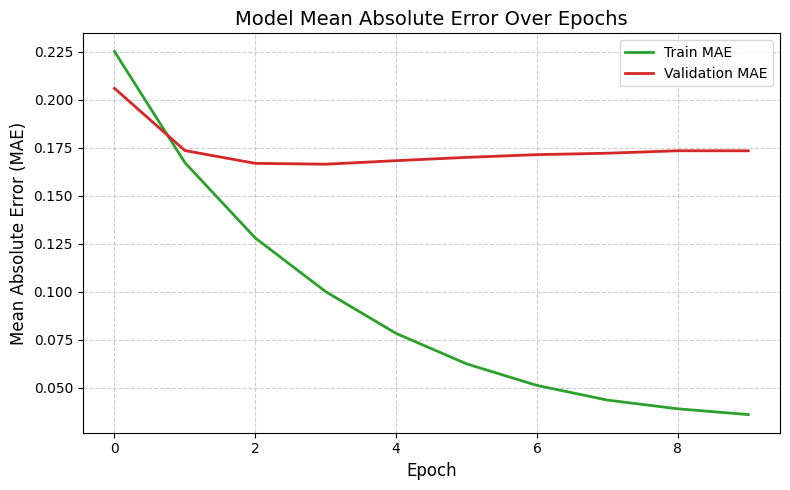

In [88]:
plt.figure(figsize=(8,5))

plt.plot(history.history['MAE'], label='Train MAE', color='#2ca02c', linewidth=2)      # hijau mint
plt.plot(history.history['val_MAE'], label='Validation MAE', color='#d62728', linewidth=2)  # merah muda (lebih ke merah agak terang)

plt.title('Model Mean Absolute Error Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Berdasarkan grafik 'Model Mean Absolute Error Over Epochs', pada epoch terakhir (epoch ke-9), nilai MAE untuk data training (hijau) mencapai sekitar 0.038, sementara nilai MAE untuk data validasi (merah) berada di sekitar 0.173

#### Root Mean Squared Error Plot

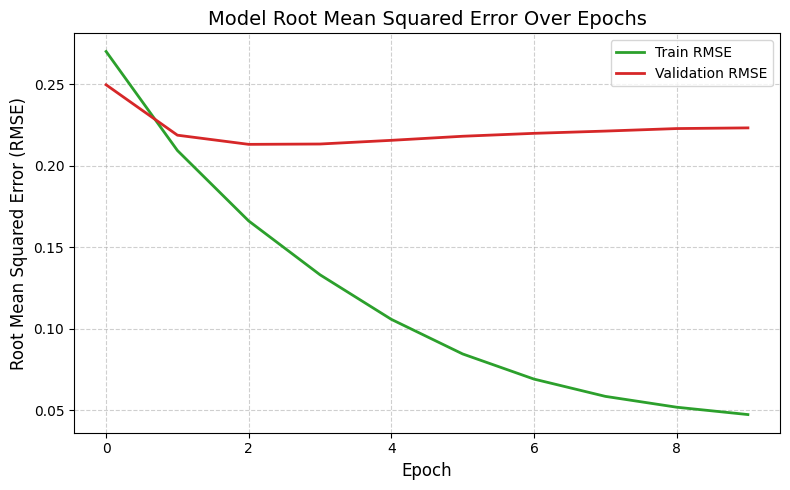

In [89]:
plt.figure(figsize=(8,5))

plt.plot(history.history['RMSE'], label='Train RMSE', color='#2ca02c', linewidth=2)       # hijau mint
plt.plot(history.history['val_RMSE'], label='Validation RMSE', color='#d62728', linewidth=2)  # merah muda

plt.title('Model Root Mean Squared Error Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Berdasarkan grafik 'Model Root Mean Squared Error Over Epochs', pada epoch terakhir (epoch ke-9), nilai RMSE untuk data training (hijau) mencapai sekitar 0.048, sementara nilai RMSE untuk data validasi (merah) berada di sekitar 0.223.